Theodoros Lambrou

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Stochastic gradient descent for SVM

Creating the dataset similarily to Practical 5. Also defining the primal problem in an unconstrained way.

In [2]:
def dataset(n_points, separable = True):
    
    m1 = np.array([0., 0.])
    s1 = np.array([[1., -0.9], [-0.9, 1.]])
    if separable:
        m2 = np.array([3., 6.])
        s2 = np.array([[1., 0.], [0., 1.]])
    else:
        m2 = np.array([1., 2.])
        s2 = np.array([[1., 0.], [0., 1.]])

    pos_class = np.random.multivariate_normal(m1, s1, n_points)
    neg_class = np.random.multivariate_normal(m2, s2, n_points)
    x = np.concatenate((pos_class, neg_class)).T
    y = np.concatenate((np.ones(n_points), -1*np.ones(n_points)))

    return x,y


def f(x,y,w,b,lamb):
    
  res = (lamb / 2) * np.dot(w.T,w) + np.sum(np.maximum(0, 1 - y*(np.dot(w.T, x) + b)))
  return res


## Experiment 1

Classical stochastic gradient descent. I start with a small value of $\gamma_t$, for instance,$\gamma_t = 1/\mu$, with $\mu$ initialized to $\mu=100$. With every iteration the value of $\mu$ is increased. Using $\lambda = 10^{-4}$ or $\lambda = 10^{-2}$ as recommended.

In [3]:
def sgd(x, y, mu, increase_value, lamb, maximum_epochs):
    
  w = np.random.rand(x.shape[0])
  b = np.random.rand(1)[0] 
    
  function = []

  epoch = 0
    
  while epoch < maximum_epochs:
      
    perm = np.random.permutation(x.shape[1]) #shuffle
    x = x[:,perm]
    y = y[perm]
    for i in range(x.shape[1]):
        
      if y[i] * (np.dot(w.T, x[:,i]) + b) > 1: w += -(1/mu) * lamb * w
      else :
        w += -(1/mu) * lamb * w +(1/mu)* y[i] * x[:,i]
        b += (1/mu) * y[i]
    
    mu += increase_value
    epoch+=1
    function.append(np.log(f(x,y,w,b,lamb)))
      
  return w,b,function

Will prove with  $\lambda = 10^{-4}$ incrementing mu by 1, 0.5, 0.1

lambda=10^{-4} incrementing the mu by 1


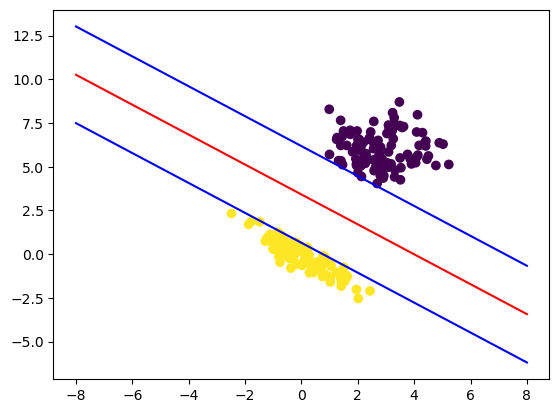

Objective function


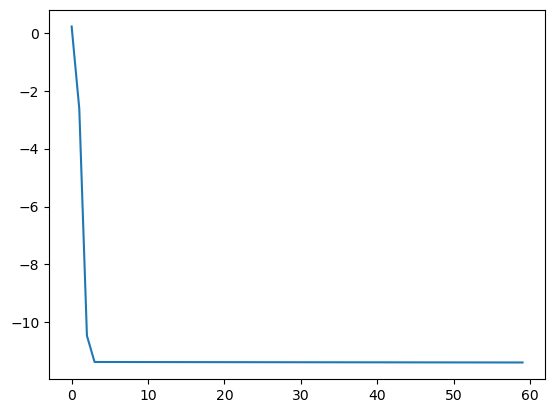

lambda=10^{-4} incrementing the mu by 0.5


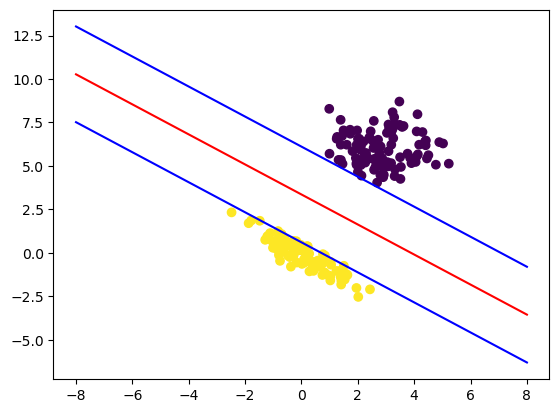

Objective function


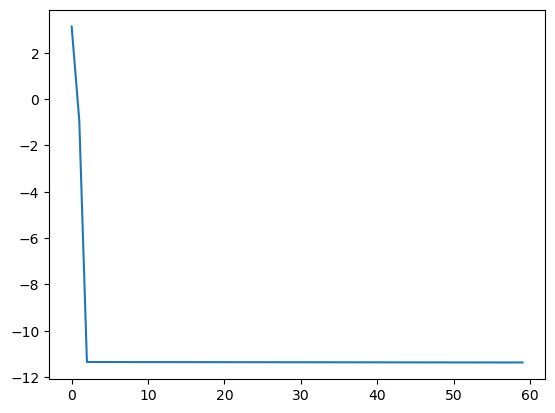

lambda=10^{-4} incrementing the mu by 0.1


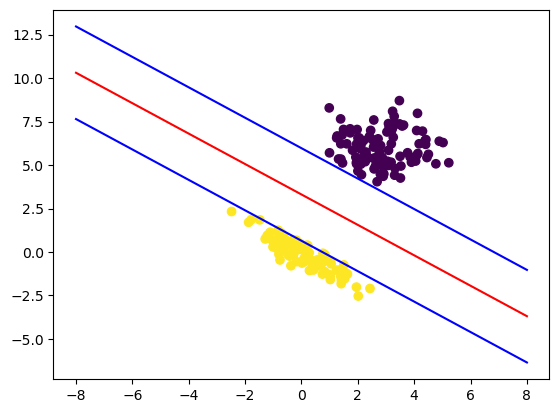

Objective function


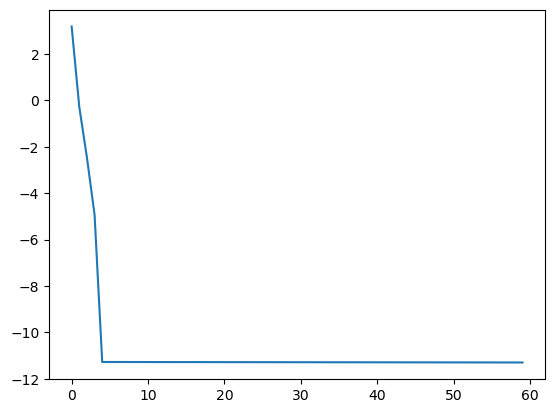

In [4]:
X, y = dataset(100)
w, b,function = sgd(X, y, 100, 1, 1e-4, 60)

print('lambda=10^{-4} incrementing the mu by 1')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd(X, y, 100, 0.5, 1e-4, 60)
print('lambda=10^{-4} incrementing the mu by 0.5')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd(X, y, 100, 0.1, 1e-4, 60)
print('lambda=10^{-4} incrementing the mu by 0.1')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()


Now will prove it with $\lambda = 10^{-2}$ incrementing mu by 1, 0.5, 0.1 

lambda=10^{-2} incrementing the mu by 1


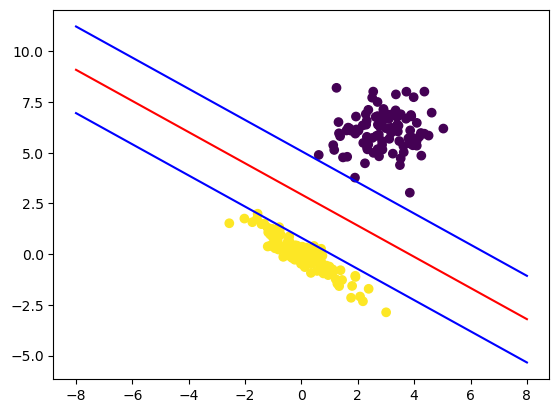

Objective function


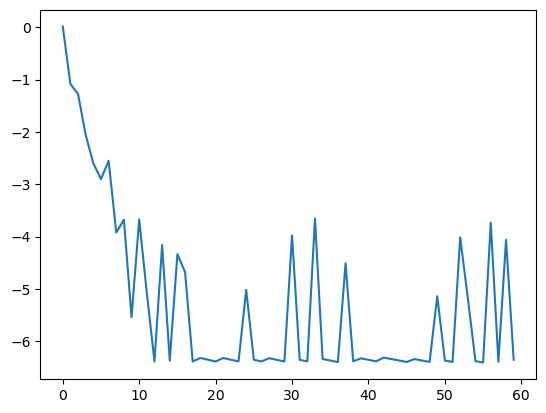

lambda=10^{-2} incrementing the mu by 0.5


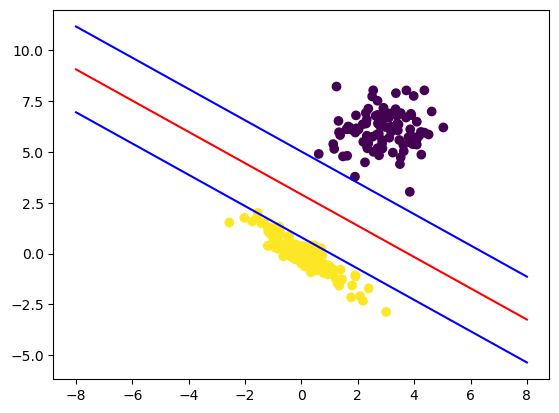

Objective function


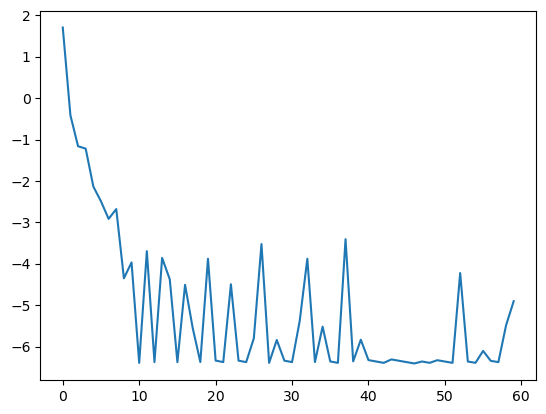

lambda=10^{-2} incrementing the mu by 0.1


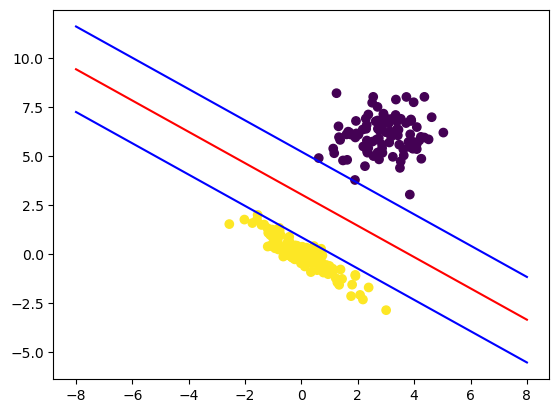

Objective function


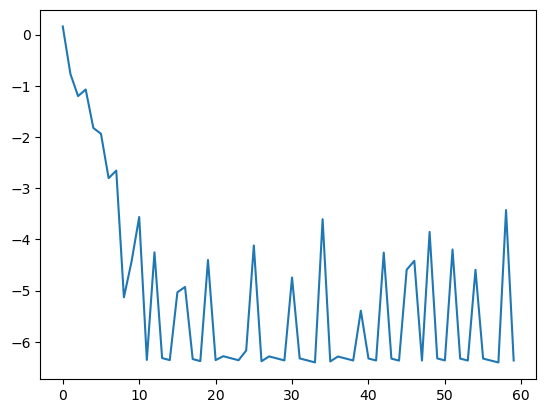

In [5]:
X,y = dataset(100)

w, b,function = sgd(X, y, 100, 1, 1e-2, 60)
print('lambda=10^{-2} incrementing the mu by 1')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b, function = sgd(X, y, 100, 0.5, 1e-2, 60)
print('lambda=10^{-2} incrementing the mu by 0.5')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd(X, y, 100, 0.1, 1e-2, 60)

print('lambda=10^{-2} incrementing the mu by 0.1')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

It looks like the method works perfectly. I have used 60 for the number of epochs after testing a bit to find a good number. Checking out the objective function, it can be observed that for bigger $\lambda$ the converge has an oscillatory behaviour, however,for lower values of $\lambda$ the method converges fastly and stably to the solution.

## Experiment 2

Moving on, will perform some experiments with the mini-batch as requested (mini-batches with a size
that of 10, 25, 50)

In [6]:
def sgd_batch(x,y,mu,increase_value,lamb,maximum_epochs,batch):

    w = np.random.rand(x.shape[0])
    b = np.random.rand(1)[0]
    function = []

    epoch = 0
    n_batch = x.shape[1] // batch
  
    while epoch < maximum_epochs:

        perm = np.random.permutation(x.shape[1])
        x = x[:,perm]
        y = y[perm]

        for i in range(n_batch):
    
            x_batch = x[:, i*batch:(i+1)*batch]
            y_batch = y[i*batch:(i+1)*batch]
            sum_w = np.zeros(w.shape)
            sum_b = 0
            for j in range(x_batch.shape[1]):
                if y_batch[j] * (np.dot(w.T, x_batch[:,j]) + b) <= 1:
                  sum_w += y_batch[j] * x_batch[:,j]
                  sum_b +=y_batch[j] 
            w += -(1/mu) * lamb * w + (1/mu) * sum_w
            b += (1/mu) * sum_b

        mu += increase_value
        epoch+=1
        function.append(np.log(f(x,y,w,b,lamb)))

    return w,b,function


Firstly checking if it works for $\lambda=10^{-4}$, incrementing mu by 1, 0.5, 0.1 

lambda=10^{-4} incrementing the mu by 1 and batch_size=10


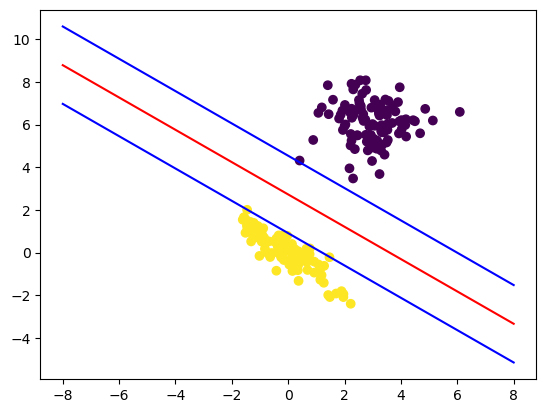

Objective function


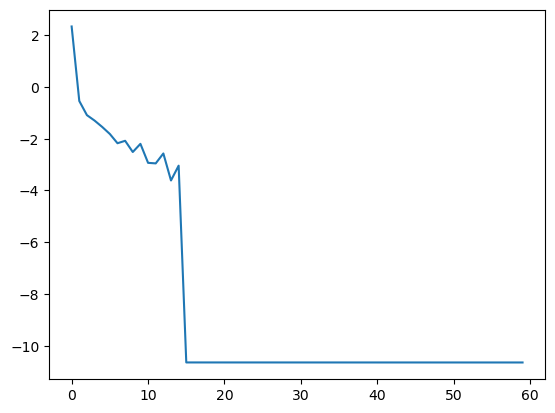

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=10


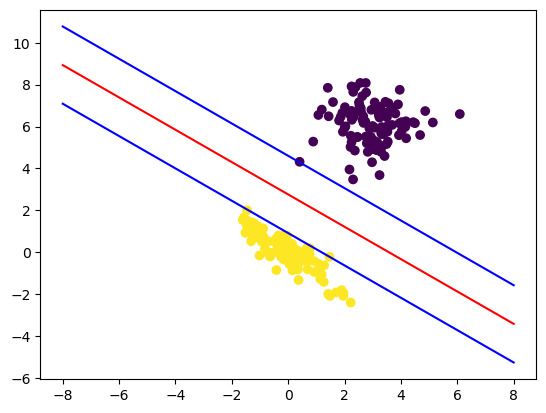

Objective function


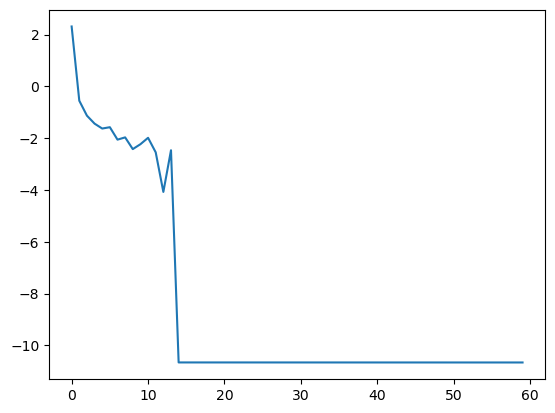

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=10


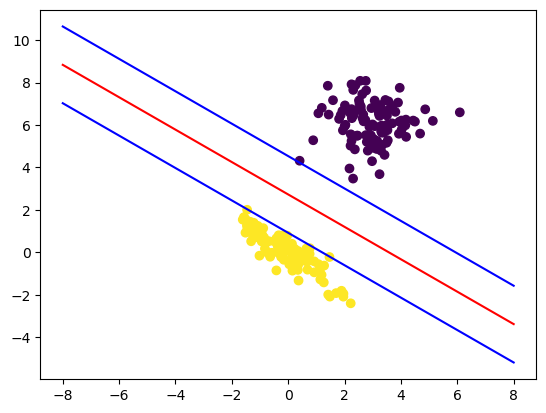

Objective function


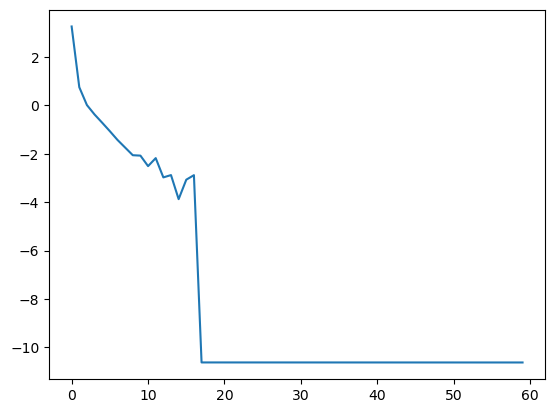

In [7]:
#Batch size: 10

X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-4, 60, 10)
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.5, 1e-4, 60, 10)
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.1, 1e-4, 60, 10)
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

lambda=10^{-4} incrementing the mu by 1 and batch_size=25


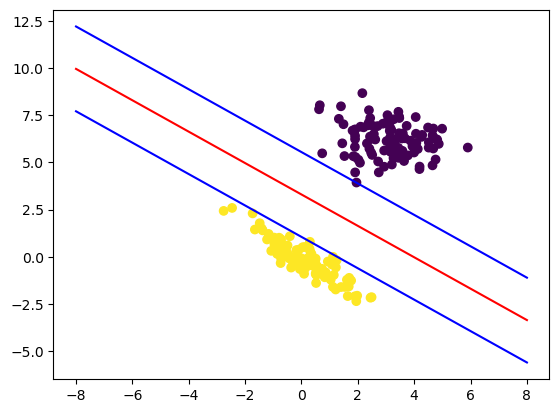

Objective function


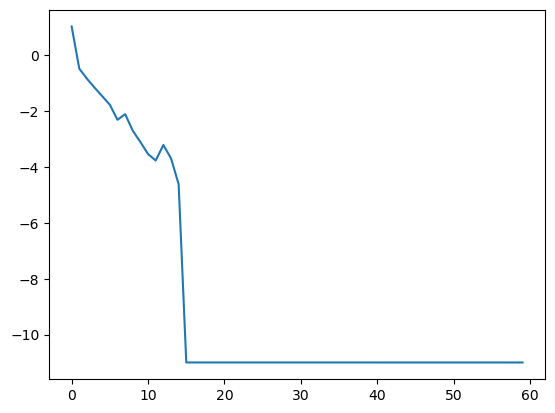

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=25


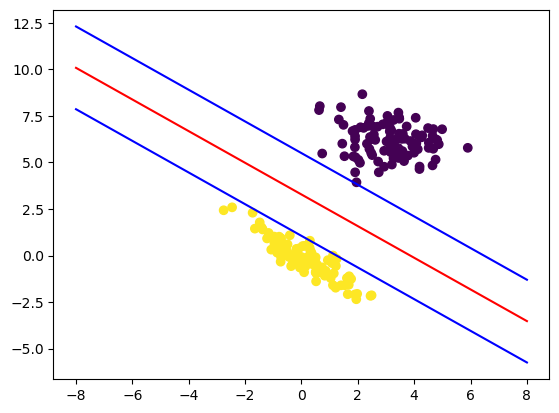

Objective function


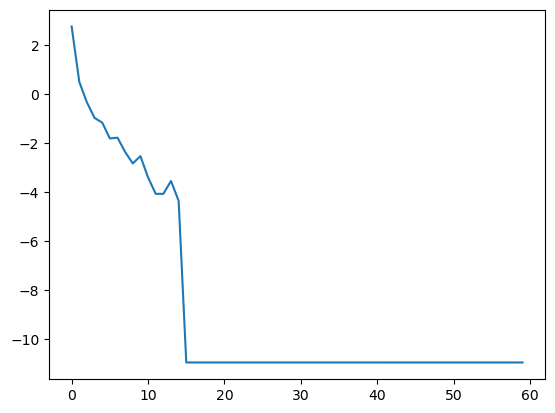

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=25


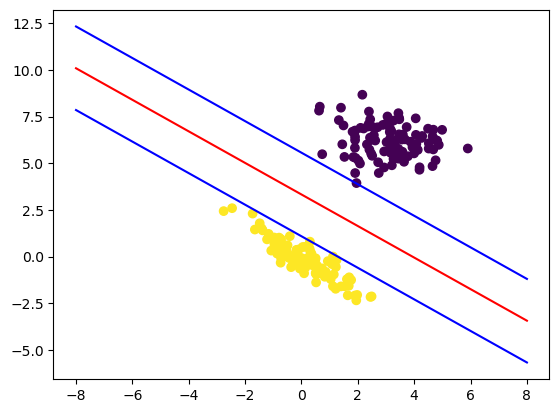

Objective function


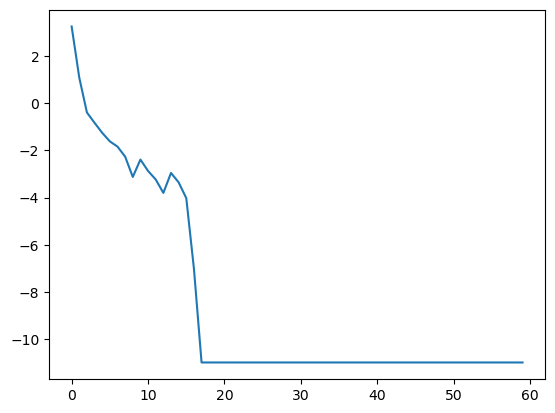

In [8]:
#Batch size: 25

X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-4, 60, 25)
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=25')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.5, 1e-4, 60, 25)
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=25')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.1, 1e-4, 60, 25)
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=25')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

lambda=10^{-4} incrementing the mu by 1 and batch_size=50


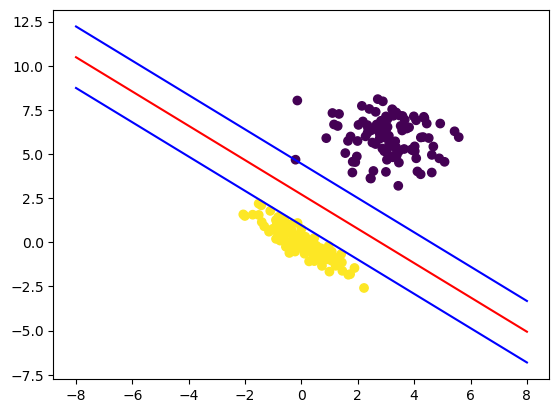

Objective function


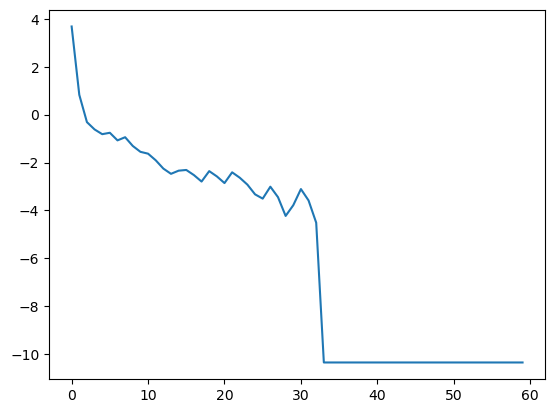

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=50


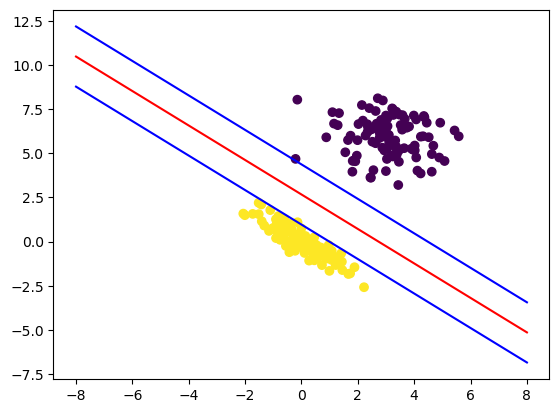

Objective function


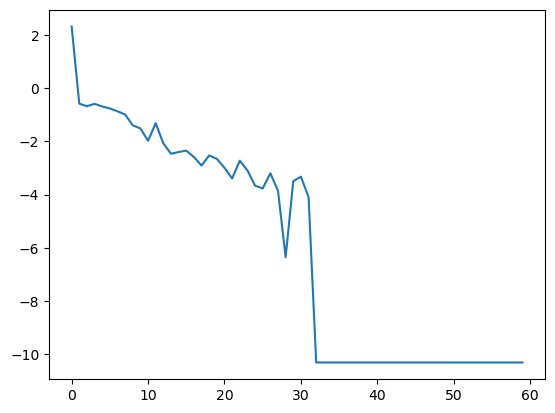

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=50


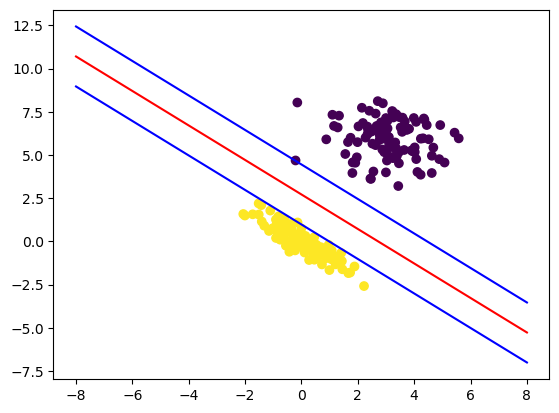

Objective function


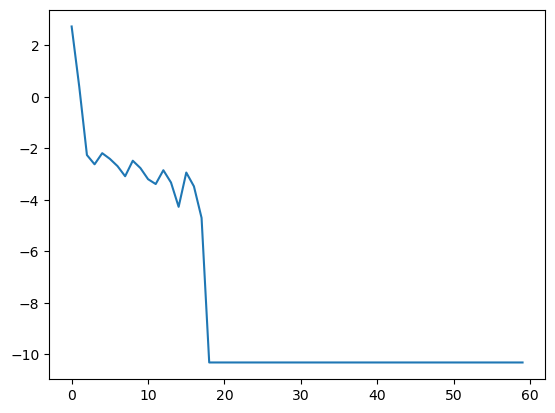

In [9]:
#Batch size: 50

X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-4, 60, 50)
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.5, 1e-4, 60, 50)
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.1, 1e-4, 60, 50)
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

Now checking the solution for $\lambda=10^{-2}$ again incrementing mu by 1, 0.5, 0.1

lambda=10^{-4} incrementing the mu by 1 and batch_size=10


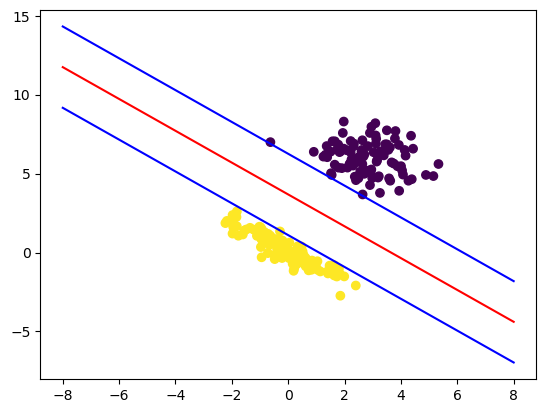

Objective function


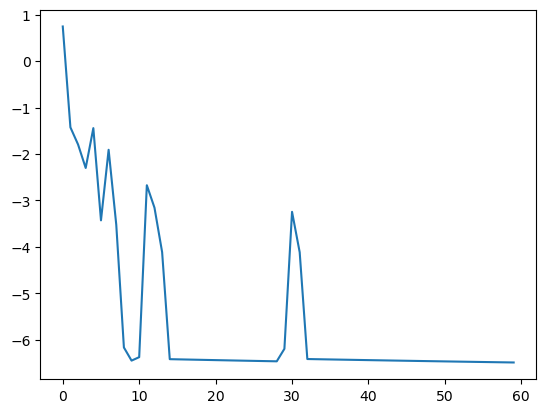

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=10


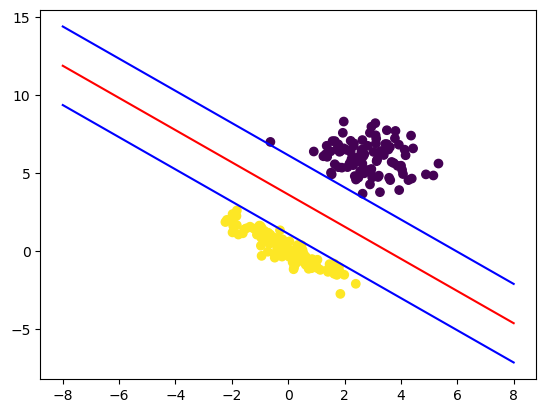

Objective function


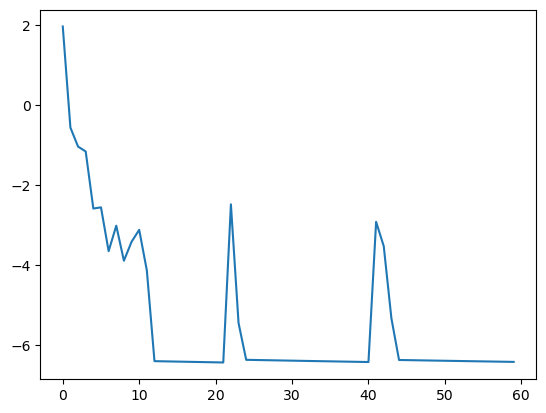

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=10


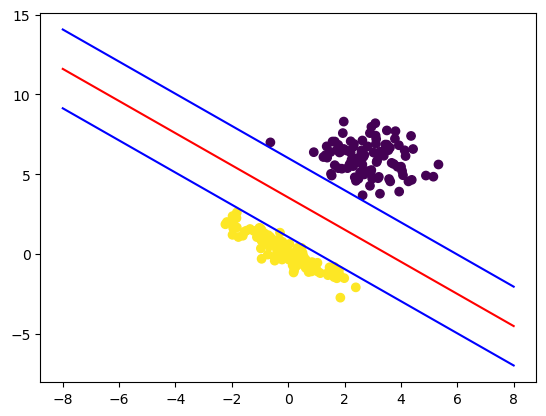

Objective function


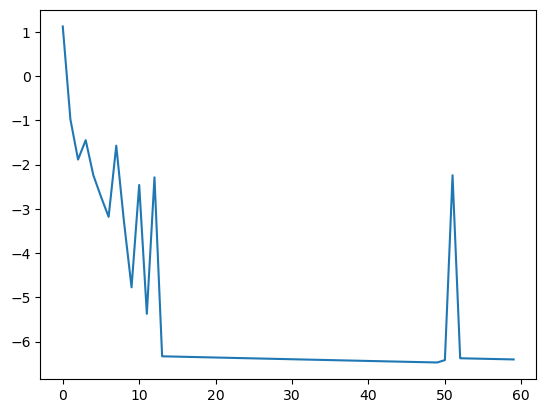

In [10]:
#Batch size: 10

X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-2, 60, 10)
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.5, 1e-2, 60, 10)
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.1, 1e-2, 60, 10)
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

lambda=10^{-4} incrementing the mu by 1 and batch_size=25


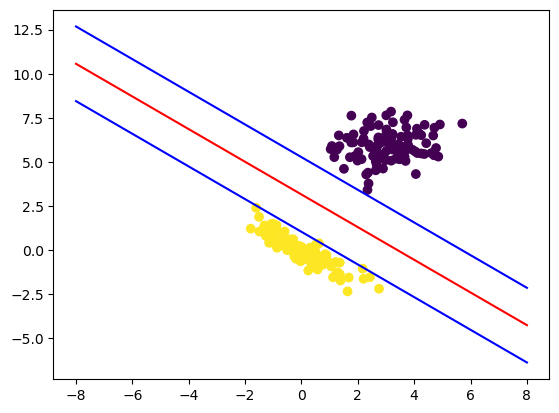

Objective function


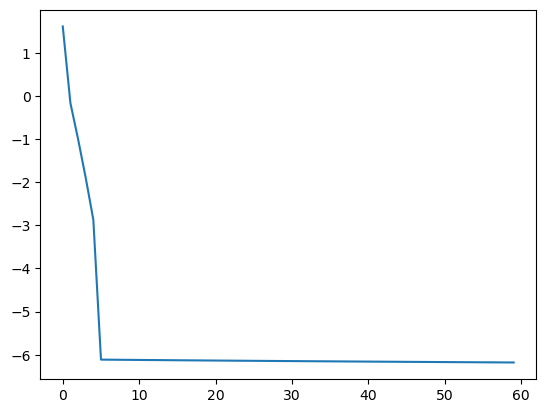

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=25


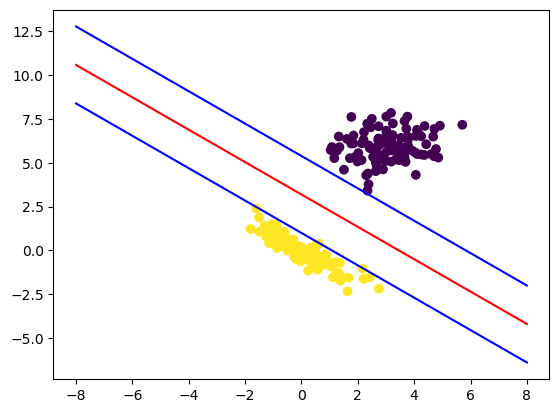

Objective function


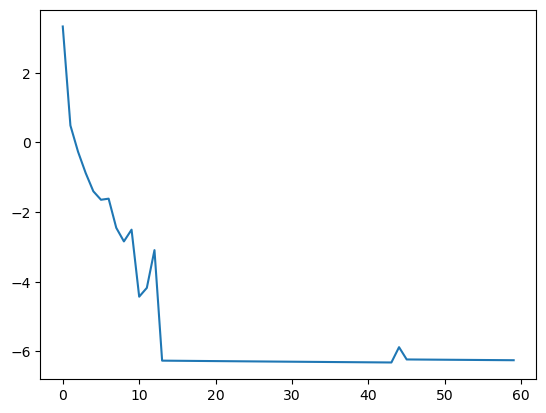

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=25


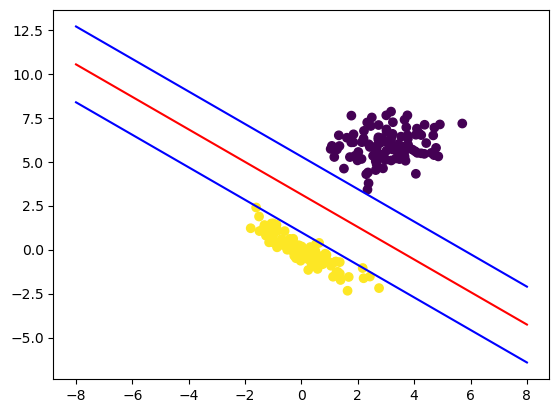

Objective function


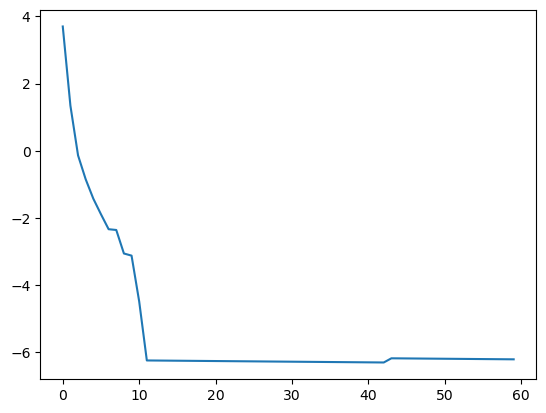

In [11]:
#Batch size: 25

X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-2, 60, 25)
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=25')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.5, 1e-2, 60, 20)
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=25')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

w, b,function = sgd_batch(X, y, 100, 0.1, 1e-2, 60, 20)
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=25')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

lambda=10^{-4} incrementing the mu by 1 and batch_size=50


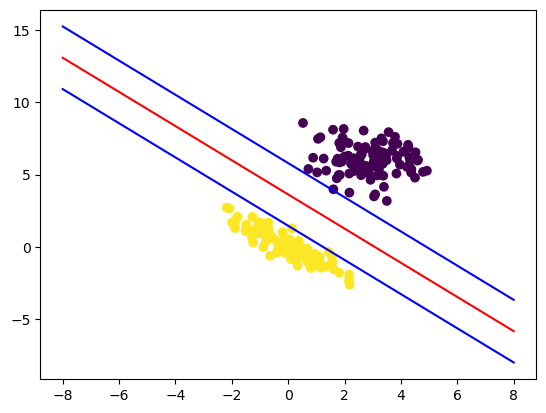

Objective function


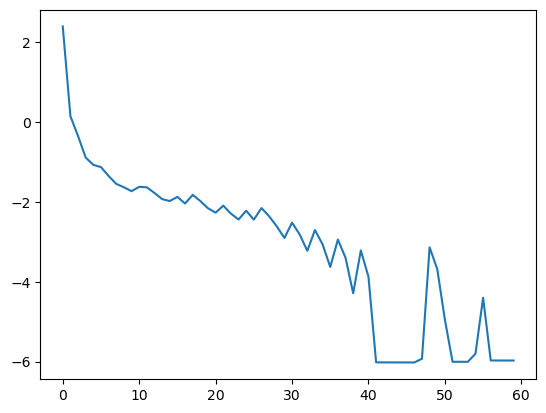

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=50


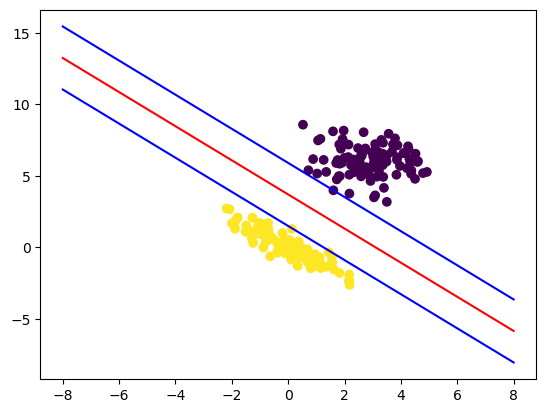

Objective function


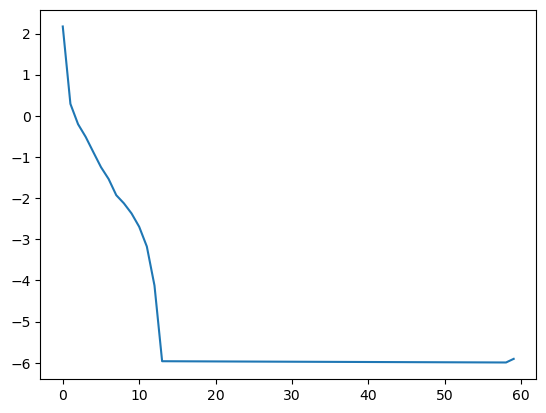

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=50


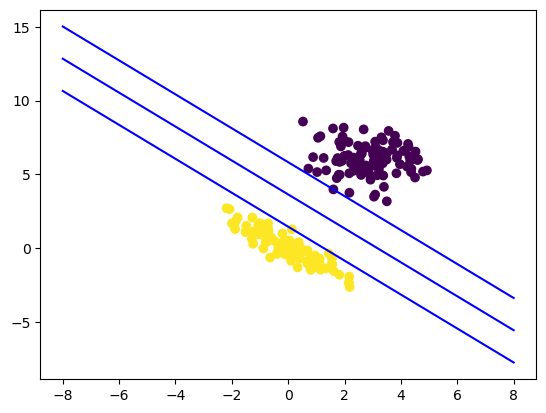

Objective function


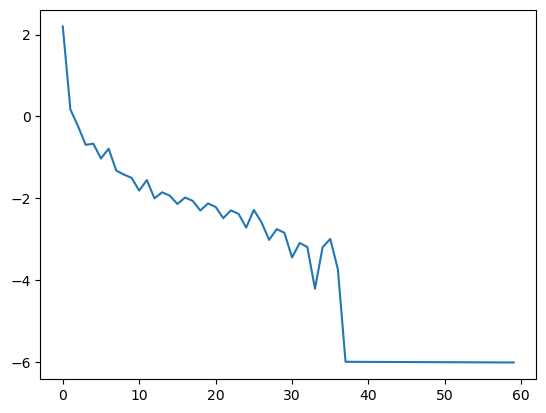

In [12]:
#Batch size: 50

X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-2, 60, 50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.5, 1e-2, 60, 50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.1, 1e-2, 60, 50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'b')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

Similarily as previously, it can be seen that when $\lambda$ has lower value, the method converges fastly than when it has bigger values. It looks like that for bigger batch sizes, the method converges more quickly than for little sizes. Also, there are cases in which the hyperplanes at distance 1 or -1 are not perfect. 

## Experiment 3

It is required to do a plot of the logarithm of the function $f(w,b)$ along each epoch for the stochastic gradient descent, minibatch and gradient descent (which is equivalent to use a mini-batch with a size equal to the number of samples), which would allow us to observe how fast each of the methods approaches the optimal solution.

In the previous experiments, the plot of the logarithm of the function can be seen.  It can be observed that in most cases, before arriving 60 epochs, the function becomes constant which means learning is no longer happening and that is why I chose 60 for the maximum number of epochs. The comparisons are made in previous cells.